# Analyse des émissions des modèles pyTorch

## Initialisation générale

### Dépendances

In [1]:
!pip install codecarbon
!pip install git+https://github.com/MihaMarkic/tflearn.git@fix/is_sequence_missing
!pip install Pillow==9.5.0

  Cloning https://github.com/MihaMarkic/tflearn.git (to revision fix/is_sequence_missing) to /tmp/pip-req-build-q2xa08qp
  Running command git clone --filter=blob:none --quiet https://github.com/MihaMarkic/tflearn.git /tmp/pip-req-build-q2xa08qp
  Running command git checkout -b fix/is_sequence_missing --track origin/fix/is_sequence_missing
  Switched to a new branch 'fix/is_sequence_missing'
  Branch 'fix/is_sequence_missing' set up to track remote branch 'fix/is_sequence_missing' from 'origin'.
  Resolved https://github.com/MihaMarkic/tflearn.git to commit 6472b8588e758ff4a33a2764d4ee638bbd0e42f0
  Preparing metadata (setup.py) ... done


In [23]:
# Modules python a importer :
# Classes
import sys
sys.path.append('../py_programs/')
sys.path.append('../testPython/')
from classEnergyAnalyzer import EnergyAnalyzer
from pyTorchModel import pyTorchModel
from classDatasets import Dataset
from CSVReader import CSVfile

# Modules
import classModelTester as Tester
import DataTools

# Librairies externes
import torchvision
import torchvision.models as ExampleModels

### Tests de validation

In [3]:
!rm temp.csv

rm: cannot remove 'temp.csv': No such file or directory


In [4]:
!python uniTestPyTorch.py

[0.5, 0.5, 0.5]
[0.5, 0.5, 0.5]
2025-08-20 12:48:25.038028: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755694105.057848    2276 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755694105.063603    2276 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755694105.078757    2276 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755694105.078802    2276 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755694105.078807    2276 computation_place

### Initialisation des variables

In [5]:
analyzer = EnergyAnalyzer("testPytorch", name_output_file="./testgeneral.csv")
tempAnalyzer = EnergyAnalyzer("testTempCsv", name_output_file="./temp.csv")

'''analyzer.display_data_axis("emissions", condFilter={"project_name":"evaluate_performance_biais6"})
analyzer.display_data_axis("emissions", x_axis="Number iterations", x_col=test_iterations, condFilter={"project_name":"evaluate_performance_biais6"})
'''
trainloader = DataTools.CIFAR10.train_inputs
sampleloader = DataTools.CIFAR10.test_sample
testloader = DataTools.CIFAR10.testloader


## Tests générals

### Initialisation des variables de la série de tests  

In [6]:
# Le nom de la machine utilisé pour faire les tests (pas de point, virgule)
label_Machine = "CollabLinux"
analyzer.set_new_project(label_Machine)

list_model = DataTools.models.list_models(module=ExampleModels)
print([(i,list_model[i]) for i in range(len(list_model))])

[(0, 'alexnet'), (1, 'convnext_base'), (2, 'convnext_large'), (3, 'convnext_small'), (4, 'convnext_tiny'), (5, 'densenet121'), (6, 'densenet161'), (7, 'densenet169'), (8, 'densenet201'), (9, 'efficientnet_b0'), (10, 'efficientnet_b1'), (11, 'efficientnet_b2'), (12, 'efficientnet_b3'), (13, 'efficientnet_b4'), (14, 'efficientnet_b5'), (15, 'efficientnet_b6'), (16, 'efficientnet_b7'), (17, 'efficientnet_v2_l'), (18, 'efficientnet_v2_m'), (19, 'efficientnet_v2_s'), (20, 'googlenet'), (21, 'inception_v3'), (22, 'maxvit_t'), (23, 'mnasnet0_5'), (24, 'mnasnet0_75'), (25, 'mnasnet1_0'), (26, 'mnasnet1_3'), (27, 'mobilenet_v2'), (28, 'mobilenet_v3_large'), (29, 'mobilenet_v3_small'), (30, 'regnet_x_16gf'), (31, 'regnet_x_1_6gf'), (32, 'regnet_x_32gf'), (33, 'regnet_x_3_2gf'), (34, 'regnet_x_400mf'), (35, 'regnet_x_800mf'), (36, 'regnet_x_8gf'), (37, 'regnet_y_128gf'), (38, 'regnet_y_16gf'), (39, 'regnet_y_1_6gf'), (40, 'regnet_y_32gf'), (41, 'regnet_y_3_2gf'), (42, 'regnet_y_400mf'), (43, 'reg

#### liste des modèles testés

In [7]:
list_id_model = [i for i in range(1,80)]
#list_id_model = [65]
#TODO remove the incompatibles models



### Test : vérifier la consommation en fonction du nombre de tâches

In [8]:
!rm temp.csv

[codecarbon WARNING @ 12:48:53] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 12:48:53] [setup] RAM Tracking...
[codecarbon INFO @ 12:48:53] [setup] CPU Tracking...


Test :  10000  iterations


[codecarbon WARNING @ 12:48:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 12:48:54] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 12:48:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 12:48:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 12:48:54] [setup] GPU Tracking...
[codecarbon INFO @ 12:48:54] No GPU found.
[codecarbon INFO @ 12:48:54] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 12:48:54] >>> Tracker's metadata:
[codecarbon INFO @ 12:48:54]   Platform system: Linux-6

Test :  100000  iterations


[codecarbon WARNING @ 12:48:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 12:48:56] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 12:48:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 12:48:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 12:48:56] [setup] GPU Tracking...
[codecarbon INFO @ 12:48:56] No GPU found.
[codecarbon INFO @ 12:48:56] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 12:48:56] >>> Tracker's metadata:
[codecarbon INFO @ 12:48:56]   Platform system: Linux-6

Test :  1000000  iterations


[codecarbon WARNING @ 12:48:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 12:48:57] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 12:48:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 12:48:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 12:48:57] [setup] GPU Tracking...
[codecarbon INFO @ 12:48:57] No GPU found.
[codecarbon INFO @ 12:48:57] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 12:48:57] >>> Tracker's metadata:
[codecarbon INFO @ 12:48:57]   Platform system: Linux-6

Test :  10000000  iterations


[codecarbon WARNING @ 12:48:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 12:48:58] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 12:48:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 12:48:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 12:48:58] [setup] GPU Tracking...
[codecarbon INFO @ 12:48:58] No GPU found.
[codecarbon INFO @ 12:48:58] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 12:48:58] >>> Tracker's metadata:
[codecarbon INFO @ 12:48:58]   Platform system: Linux-6

Test :  100000000  iterations


[codecarbon WARNING @ 12:49:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 12:49:00] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 12:49:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 12:49:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 12:49:00] [setup] GPU Tracking...
[codecarbon INFO @ 12:49:00] No GPU found.
[codecarbon INFO @ 12:49:00] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 12:49:00] >>> Tracker's metadata:
[codecarbon INFO @ 12:49:00]   Platform system: Linux-6

Error file already created
['id_col', 'timestamp', 'project_name', 'run_id', 'experiment_id', 'duration', 'emissions', 'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy', 'gpu_energy', 'ram_energy', 'energy_consumed', 'country_name', 'country_iso_code', 'region', 'cloud_provider', 'cloud_region', 'os', 'python_version', 'codecarbon_version', 'cpu_count', 'cpu_model', 'gpu_count', 'gpu_model', 'longitude', 'latitude', 'ram_total_size', 'tracking_mode', 'on_cloud', 'pue']
[1, '2025-08-20T12:48:54', 'evaluate_performance_biais:consuming_function:number iterations = 10000', 'd99b0a06-f8bc-41cb-96ea-2dbfa6b1bec2', '5b0fa12a-3dd7-45bb-9766-cc326314d9f1', '0.0085282150000125', '1.902520499889493e-08', '2.2308542876635893e-06', '42.5', '0.0', '10.0', '5.832494583325837e-08', '0.0', '8.312377777820581e-09', '6.663732361107893e-08', 'United States', 'USA', 'south carolina', '', '', 'Linux-6.1.123+-x86_64-with-glibc2.35', '3.12.11', '3.0.4', '2', 'Intel(R) Xeon(R) CPU @ 2.20GHz

/content/classEnergyAnalyzer.py:166: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


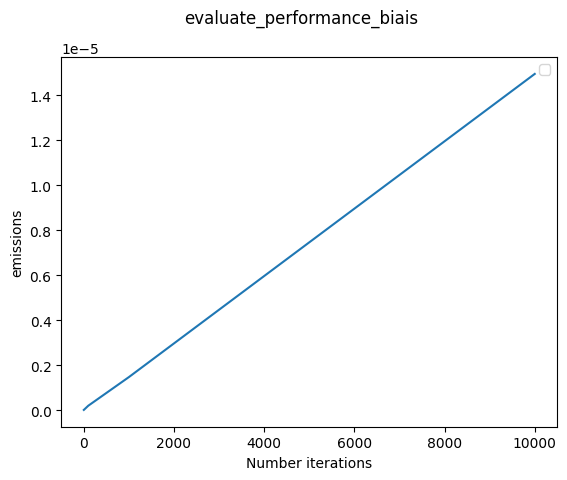

In [9]:
Tester.testGpu(tempAnalyzer, 5)

### Test : vérifier la compatibilité des modèles avec la base de donnée

In [10]:
list_worked_models = Tester.pyTorch_series_test_model_dataset_compatibility(list_id_model, trainloader, True)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
          Conv2d-243            [-1, 672, 1, 1]          19,488
         Sigmoid-244            [-1, 672, 1, 1]               0
SqueezeExcitation-245            [-1, 672, 4, 4]               0
          Conv2d-246            [-1, 112, 4, 4]          75,264
     BatchNorm2d-247            [-1, 112, 4, 4]             224
 StochasticDepth-248            [-1, 112, 4, 4]               0
          MBConv-249            [-1, 112, 4, 4]               0
          Conv2d-250            [-1, 672, 4, 4]          75,264
     BatchNorm2d-251            [-1, 672, 4, 4]           1,344
            SiLU-252            [-1, 672, 4, 4]               0
          Conv2d-253            [-1, 672, 4, 4]          16,800
     BatchNorm2d-254            [-1, 672, 4, 4]           1,344
            SiLU-255            [-1, 672, 4, 4]               0
AdaptiveAvgPool2d-256            [-1, 672, 1, 1]               0
          Conv2d-257    

/usr/local/lib/python3.12/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           9,408
       BatchNorm2d-2           [-1, 64, 32, 32]             128
       BasicConv2d-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]           4,096
       BatchNorm2d-6           [-1, 64, 16, 16]             128
       BasicConv2d-7           [-1, 64, 16, 16]               0
            Conv2d-8          [-1, 192, 16, 16]         110,592
       BatchNorm2d-9          [-1, 192, 16, 16]             384
      BasicConv2d-10          [-1, 192, 16, 16]               0
        MaxPool2d-11            [-1, 192, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          12,288
      BatchNorm2d-13             [-1, 64, 8, 8]             128
      BasicConv2d-14             [-1, 6

/usr/local/lib/python3.12/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
          Conv2d-414            [-1, 256, 4, 4]         589,824
     BatchNorm2d-415            [-1, 256, 4, 4]             512
            ReLU-416            [-1, 256, 4, 4]               0
          Conv2d-417           [-1, 1024, 4, 4]         262,144
     BatchNorm2d-418           [-1, 1024, 4, 4]           2,048
            ReLU-419           [-1, 1024, 4, 4]               0
      Bottleneck-420           [-1, 1024, 4, 4]               0
          Conv2d-421            [-1, 256, 4, 4]         262,144
     BatchNorm2d-422            [-1, 256, 4, 4]             512
            ReLU-423            [-1, 256, 4, 4]               0
          Conv2d-424            [-1, 256, 4, 4]         589,824
     BatchNorm2d-425            [-1, 256, 4, 4]             512
            ReLU-426            [-1, 256, 4, 4]               0
          Conv2d-427           [-1, 1024, 4, 4]         262,144
     BatchNorm2d-428      

### Test : entrainement sur une seule image pour vérifier les modèles compatibles (remplacé par summary)

In [11]:
#Tester.pyTorch_series_train_and_track_emissions(analyzer, list_id_model,testloader,label_Machine, 1, False)

In [12]:
!mkdir model_one_image
!cp *.pth ./model_one_image
!tar cvf model_one_image.tar model_one_image/

mv: cannot stat '*.pth': No such file or directory
model_one_image/


Si il n'y a pas d'erreurs dans le test ci-dessus avec la list de modeles, alors le test suivant peut être executé et ne devrait pas retourner d'erreurs

### Test : Entrainement sur la base de donnée CIRFA10

In [13]:
number_epoch_tested = 2
#Tester.pyTorch_series_train_and_track_emissions(analyzer, list_worked_models,trainloader,label_Machine, 2, False)

In [14]:
!mkdir model_CIRFA
!mv *.pth ./model_CIRFA
!tar cvf model_CIRFA.tar model_CIRFA/

mv: cannot stat '*.pth': No such file or directory
model_CIRFA/


### Préparation pour téléchargement

In [15]:
!mkdir csv_result
!cp *.csv csv_result
!tar cvf csv_result.tar csv_result/

csv_result/
csv_result/temp.csv
csv_result/testEnergyAnalyzer.csv


Partie moins critique puiqu'on a les résultat, mais comme les données peuvent êtres perdus il faut tout télécharger